# Problem Statement- 
    Detecting the number of people entering and exiting a metro station using the YOLOv8 model. 
    This data will help determine the frequency of train services to accommodate passenger flow.

### Solution - 
use yolov8 model

custom dataset 
  find images and labels / annotate 
  inputs - metro stations, train stations, university, 

clean the data 
    Cleaning 
    Resize, Broken images ,Duplicates
    Cluster
    Outliers
    augmentation- blurry, dark, bright

EDA- visualize, graphs

Split dataset into 80/20

Training
    Hyper parameters 
    Fine tuning

Post processing/ testing
    Metrics
    Graphs


#### Dataset Analysis Summary: 

    Dataset contains 6175 images
    Valid images are 100.00% (6,175) of the data, invalid are 0.00% (0) of the data

#### Duplicates - removed 
        before - 6175
        after - 6146 
        Used the imagehash library to generate hashes for each image.
        Iterated through image files, checking for hash collisions to find duplicates.
        Deleted duplicate images while retaining the first occurrence.

        Duplicates: 116
        Dark: 2
        Bright: 0
        Blurry: 0
        Total unique images: 118

#### Data splitting 
    train - 80
    test - 20

### Distribution Graphs
#### Counting the avg number of people     

Average number of people (class '1') per image: 63.82
Total number of images in the folder: 6290
Total number of bounding boxes (class '1') in the dataset: 401422


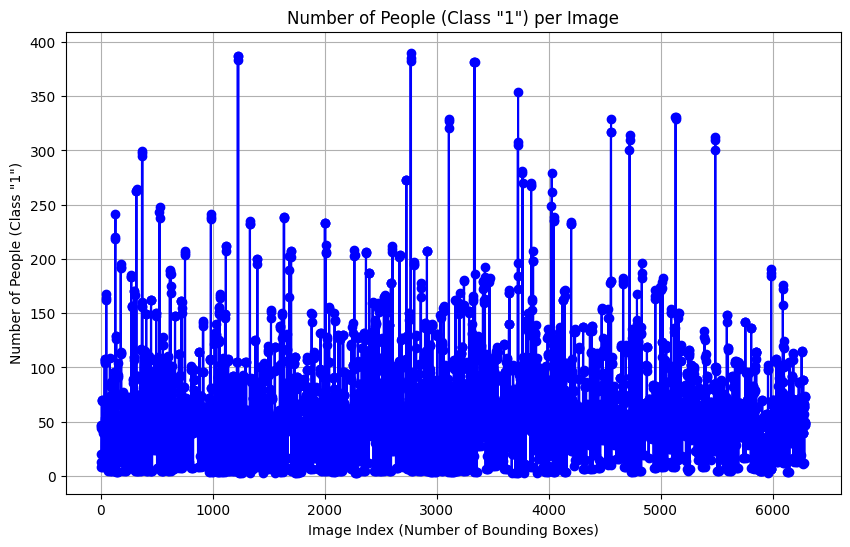

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

def load_labels(labels_folder):
    """Loads YOLO label files and counts only the bounding boxes of class '1'."""
    label_files = [f for f in os.listdir(labels_folder) if f.endswith('.txt')]
    bounding_box_counts = []

    for label_file in label_files:
        label_path = os.path.join(labels_folder, label_file)
        with open(label_path, 'r') as file:
            # Filter only the bounding boxes labeled as class '1'
            boxes = [line for line in file.readlines() if line.startswith('1')]
            bounding_box_counts.append(len(boxes))

    return bounding_box_counts, len(label_files)  # Return counts and number of images

def calculate_avg_people(bounding_box_counts):
    """Calculates the average number of people per image."""
    total_people = sum(bounding_box_counts)
    num_images = len(bounding_box_counts)
    avg_people = total_people / num_images if num_images > 0 else 0
    print(f"Average number of people (class '1') per image: {avg_people:.2f}")
    return total_people, num_images  # Return total and number of images

def plot_people_count(bounding_box_counts):
    """Plots a graph with x-axis as image index and y-axis as number of people."""
    num_images = len(bounding_box_counts)
    x = range(1, num_images + 1)  # Image indices as x-axis
    y = bounding_box_counts  # People count (bounding boxes of class '1') as y-axis

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.title('Number of People (Class "1") per Image')
    plt.xlabel('Image Index (Number of Bounding Boxes)')
    plt.ylabel('Number of People (Class "1")')
    plt.grid(True)
    plt.show()

def main():
    labels_folder = "C:/Users/Neha KB/Desktop/custom/c_train/train/labels"  # Path to YOLO label folder

    # Load bounding box counts for class '1' from YOLO label files
    bounding_box_counts, total_images = load_labels(labels_folder)

    # Calculate average number of people and get total count
    total_people, num_images = calculate_avg_people(bounding_box_counts)

    # Print total images and total bounding boxes in the dataset
    print(f"Total number of images in the folder: {total_images}")
    print(f"Total number of bounding boxes (class '1') in the dataset: {total_people}")

    # Plot the number of people (class '1') per image
    plot_people_count(bounding_box_counts)

if __name__ == "__main__":
    main()


Average number of people (class '1') per image: 63.82
Total number of images in the folder: 6290
Total number of bounding boxes (class '1') in the dataset: 401422


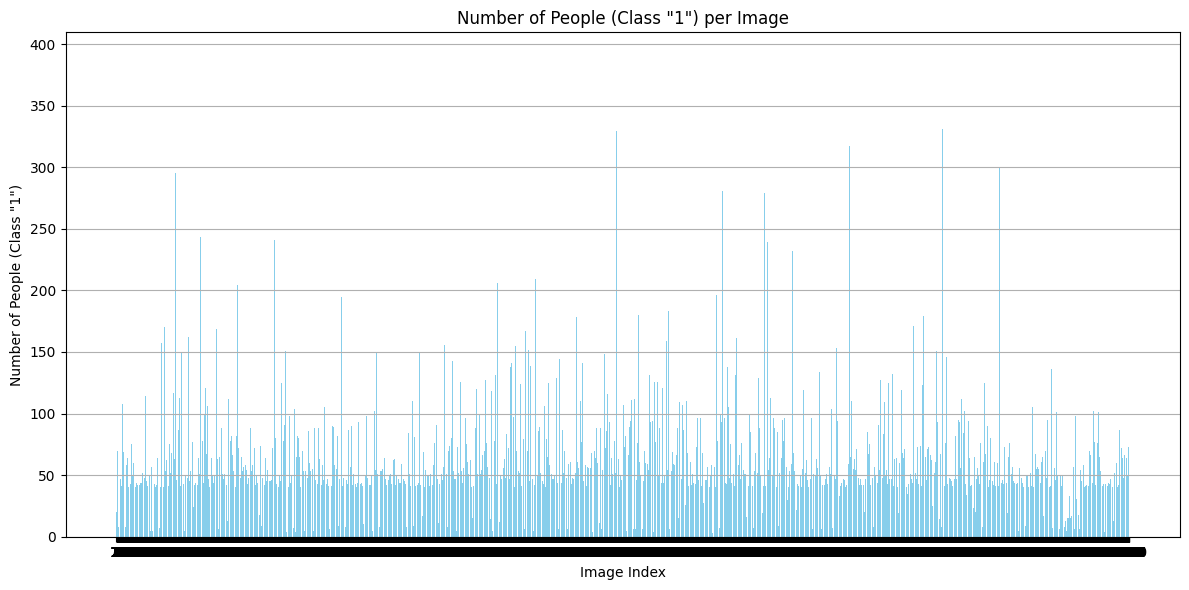

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

def load_labels(labels_folder):
    """Loads YOLO label files and counts only the bounding boxes of class '1'."""
    label_files = [f for f in os.listdir(labels_folder) if f.endswith('.txt')]
    bounding_box_counts = []

    for label_file in label_files:
        label_path = os.path.join(labels_folder, label_file)
        with open(label_path, 'r') as file:
            # Filter only the bounding boxes labeled as class '1'
            boxes = [line for line in file.readlines() if line.startswith('1')]
            bounding_box_counts.append(len(boxes))

    return bounding_box_counts, len(label_files)  # Return counts and number of images

def calculate_avg_people(bounding_box_counts):
    """Calculates the average number of people per image."""
    total_people = sum(bounding_box_counts)
    num_images = len(bounding_box_counts)
    avg_people = total_people / num_images if num_images > 0 else 0
    print(f"Average number of people (class '1') per image: {avg_people:.2f}")
    return total_people, num_images  # Return total and number of images

def plot_people_vs_image(bounding_box_counts):
    """Plots the number of people against the image index."""
    num_images = len(bounding_box_counts)
    x = range(1, num_images + 1)  # Image indices as x-axis
    y = bounding_box_counts  # People count (bounding boxes of class '1') as y-axis

    plt.figure(figsize=(12, 6))
    plt.bar(x, y, color='skyblue')
    plt.title('Number of People (Class "1") per Image')
    plt.xlabel('Image Index')
    plt.ylabel('Number of People (Class "1")')
    plt.xticks(x)  # Show each image index on the x-axis
    plt.grid(axis='y')
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()

def main():
    labels_folder = "C:/Users/Neha KB/Desktop/custom/c_train/train/labels"  # Path to YOLO label folder

    # Load bounding box counts for class '1' from YOLO label files
    bounding_box_counts, total_images = load_labels(labels_folder)

    # Calculate average number of people and get total count
    total_people, num_images = calculate_avg_people(bounding_box_counts)

    # Print total images and total bounding boxes in the dataset
    print(f"Total number of images in the folder: {total_images}")
    print(f"Total number of bounding boxes (class '1') in the dataset: {total_people}")

    # Plot the number of people (class '1') per image
    plot_people_vs_image(bounding_box_counts)

if __name__ == "__main__":
    main()


Number of images with 0-10 people: 405
Number of images with 11-20 people: 185
Number of images with 21-30 people: 69
Number of images with 31-40 people: 305
Number of images with 41-50 people: 1864
Number of images with 51-60 people: 1088
Number of images with 61-70 people: 611
Number of images with 71-80 people: 389
Number of images with 81-90 people: 311
Number of images with 91-100 people: 244
Number of images with 101-110 people: 210
Number of images with 111-120 people: 122
Number of images with 121-130 people: 94
Number of images with 131-140 people: 80
Number of images with 141-150 people: 55
Number of images with 151-160 people: 49
Number of images with 161-170 people: 45
Number of images with 171-180 people: 28
Number of images with 181-190 people: 23
Number of images with 191-200 people: 15
Number of images with 201+ people: 98


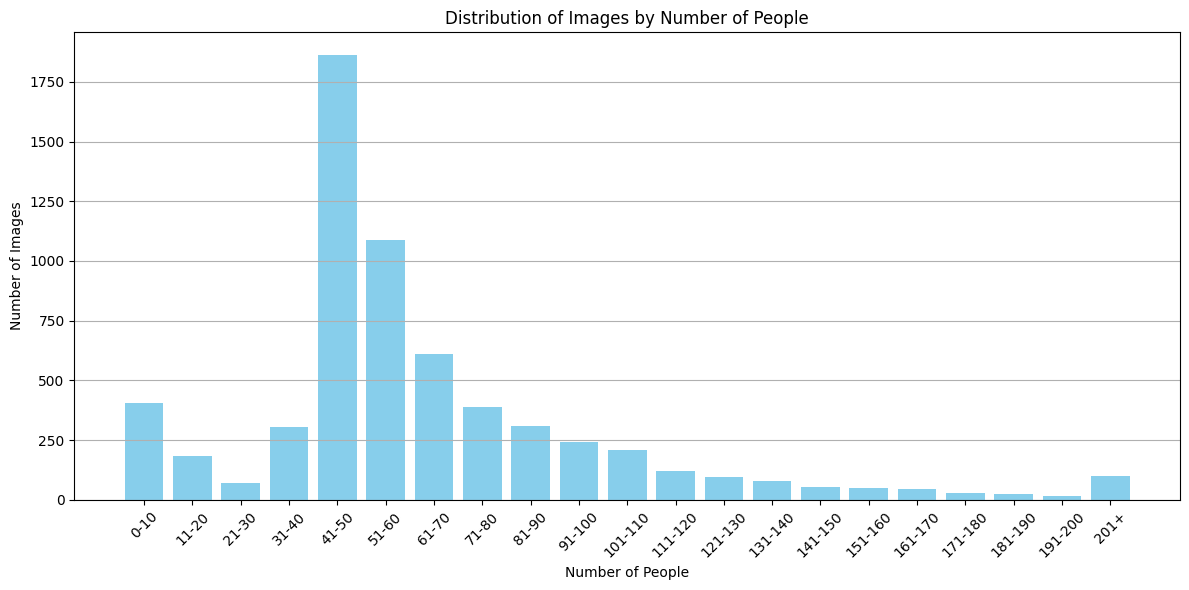

In [13]:
import os
import matplotlib.pyplot as plt

def load_labels(labels_folder):
    """Loads YOLO label files and counts only the bounding boxes of class '1'."""
    label_files = [f for f in os.listdir(labels_folder) if f.endswith('.txt')]
    bounding_box_counts = []

    for label_file in label_files:
        label_path = os.path.join(labels_folder, label_file)
        with open(label_path, 'r') as file:
            # Filter only the bounding boxes labeled as class '1'
            boxes = [line for line in file.readlines() if line.startswith('1')]
            bounding_box_counts.append(len(boxes))

    return bounding_box_counts, len(label_files)  # Return counts and number of images

def categorize_people(bounding_box_counts):
    """Categorizes images based on the number of detected people."""
    categories = {
        '0-10': 0,
        '11-20': 0,
        '21-30': 0,
        '31-40': 0,
        '41-50': 0,
        '51-60': 0,
        '61-70': 0,
        '71-80': 0,
        '81-90': 0,
        '91-100': 0,
        '101-110': 0,
        '111-120': 0,
        '121-130': 0,
        '131-140': 0,
        '141-150': 0,
        '151-160': 0,
        '161-170': 0,
        '171-180': 0,
        '181-190': 0,
        '191-200': 0,
        '201+': 0
    }

    for count in bounding_box_counts:
        if count <= 10:
            categories['0-10'] += 1
        elif count <= 20:
            categories['11-20'] += 1
        elif count <= 30:
            categories['21-30'] += 1
        elif count <= 40:
            categories['31-40'] += 1
        elif count <= 50:
            categories['41-50'] += 1
        elif count <= 60:
            categories['51-60'] += 1
        elif count <= 70:
            categories['61-70'] += 1
        elif count <= 80:
            categories['71-80'] += 1
        elif count <= 90:
            categories['81-90'] += 1
        elif count <= 100:
            categories['91-100'] += 1
        elif count <= 110:
            categories['101-110'] += 1
        elif count <= 120:
            categories['111-120'] += 1
        elif count <= 130:
            categories['121-130'] += 1
        elif count <= 140:
            categories['131-140'] += 1
        elif count <= 150:
            categories['141-150'] += 1
        elif count <= 160:
            categories['151-160'] += 1
        elif count <= 170:
            categories['161-170'] += 1
        elif count <= 180:
            categories['171-180'] += 1
        elif count <= 190:
            categories['181-190'] += 1
        elif count <= 200:
            categories['191-200'] += 1
        else:
            categories['201+'] += 1

    return categories

def plot_people_distribution(categories):
    """Plots the distribution of images across the defined categories."""
    labels = list(categories.keys())
    counts = list(categories.values())

    plt.figure(figsize=(12, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.title('Distribution of Images by Number of People')
    plt.xlabel('Number of People')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def main():
    labels_folder = "C:/Users/Neha KB/Desktop/custom/c_train/train/labels"  # Path to YOLO label folder

    # Load bounding box counts for class '1' from YOLO label files
    bounding_box_counts, total_images = load_labels(labels_folder)

    # Categorize images based on the number of detected people
    categories = categorize_people(bounding_box_counts)

    # Print the distribution of images across the defined categories
    for category, count in categories.items():
        print(f"Number of images with {category} people: {count}")

    # Plot the distribution of images
    plot_people_distribution(categories)

if __name__ == "__main__":
    main()


### Density map

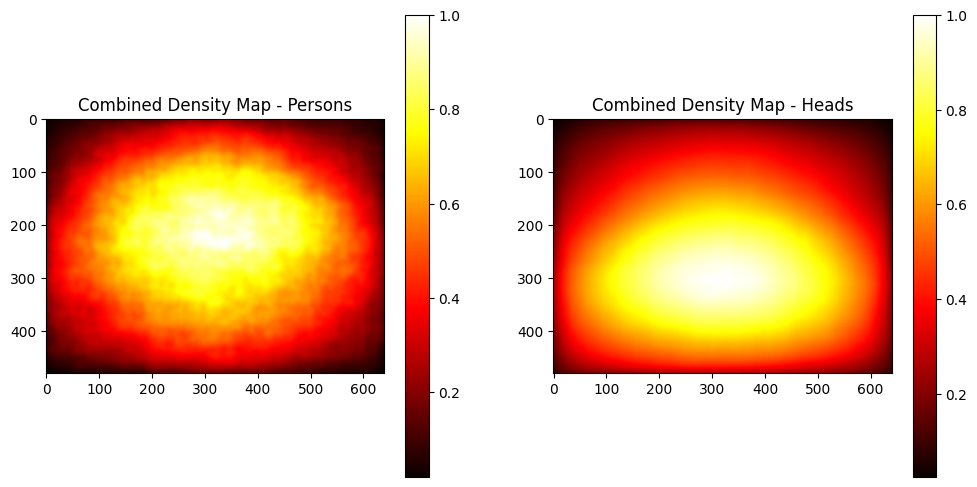

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Parameters
image_width, image_height = 640, 480  # Size of the density map
folder_path ="C:/Users/Neha KB/Desktop/custom/c_train/train/labels"  # Directory containing the text files

# Function to create density maps for given class labels
def create_density_maps_from_file(file_path):
    density_map_person = np.zeros((image_height, image_width), dtype=np.float32)
    density_map_head = np.zeros((image_height, image_width), dtype=np.float32)

    with open(file_path, 'r') as file:
        for line in file:
            label, x_center, y_center, width, height = map(float, line.split())
            if label == 1:  # Class 1 for 'person'
                # Convert from normalized to pixel coordinates
                x_center_pixel = int(x_center * image_width)
                y_center_pixel = int(y_center * image_height)
                width_pixel = int(width * image_width)
                height_pixel = int(height * image_height)

                # Define the bounding box
                x1 = max(0, x_center_pixel - width_pixel // 2)
                y1 = max(0, y_center_pixel - height_pixel // 2)
                x2 = min(image_width - 1, x_center_pixel + width_pixel // 2)
                y2 = min(image_height - 1, y_center_pixel + height_pixel // 2)

                # Increment the density map for 'person'
                density_map_person[y1:y2, x1:x2] += 1

            elif label == 0:  # Class 0 for 'head'
                # Convert from normalized to pixel coordinates
                x_center_pixel = int(x_center * image_width)
                y_center_pixel = int(y_center * image_height)
                width_pixel = int(width * image_width)
                height_pixel = int(height * image_height)

                # Define the bounding box
                x1 = max(0, x_center_pixel - width_pixel // 2)
                y1 = max(0, y_center_pixel - height_pixel // 2)
                x2 = min(image_width - 1, x_center_pixel + width_pixel // 2)
                y2 = min(image_height - 1, y_center_pixel + height_pixel // 2)

                # Increment the density map for 'head'
                density_map_head[y1:y2, x1:x2] += 1

    # Normalize the density maps for visualization
    density_map_person = cv2.GaussianBlur(density_map_person, (15, 15), 0)
    density_map_person /= density_map_person.max() if density_map_person.max() > 0 else 1  # Avoid division by zero

    density_map_head = cv2.GaussianBlur(density_map_head, (15, 15), 0)
    density_map_head /= density_map_head.max() if density_map_head.max() > 0 else 1  # Avoid division by zero

    return density_map_person, density_map_head

# Initialize lists to hold density maps
all_density_maps_person = []
all_density_maps_head = []

# Loop through all text files in the specified directory
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        density_map_person, density_map_head = create_density_maps_from_file(file_path)
        all_density_maps_person.append(density_map_person)
        all_density_maps_head.append(density_map_head)

# Combine density maps for 'person' and 'head' by summing them up
combined_density_map_person = np.sum(all_density_maps_person, axis=0)
combined_density_map_head = np.sum(all_density_maps_head, axis=0)

# Normalize the combined density maps for visualization
combined_density_map_person = cv2.GaussianBlur(combined_density_map_person, (15, 15), 0)
combined_density_map_person /= combined_density_map_person.max() if combined_density_map_person.max() > 0 else 1  # Avoid division by zero

combined_density_map_head = cv2.GaussianBlur(combined_density_map_head, (15, 15), 0)
combined_density_map_head /= combined_density_map_head.max() if combined_density_map_head.max() > 0 else 1  # Avoid division by zero

# Display the combined density maps
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(combined_density_map_person, cmap='hot')
plt.colorbar()
plt.title('Combined Density Map - Persons')

plt.subplot(1, 2, 2)
plt.imshow(combined_density_map_head, cmap='hot')
plt.colorbar()
plt.title('Combined Density Map - Heads')

plt.show()